训练集分类错误个数： 0
训练集分类错误个数： 0


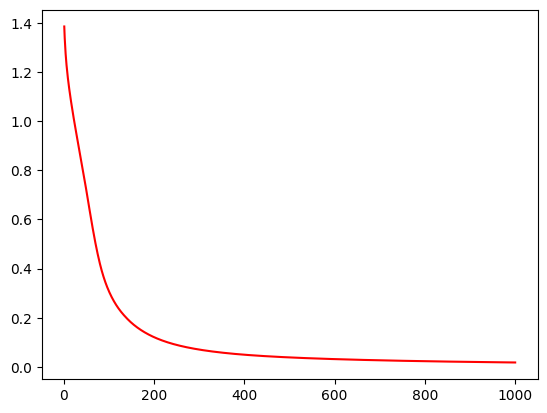

In [26]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

df=pandas.read_csv('wheelchair_dataset.csv')
data=np.array(df,dtype=float)

m_all=np.shape(data)[0]
d=np.shape(data)[1]-1
m_train=200
m_test=m_all-m_train
learning_rate=0.1
iteration=1000
n=3
c=int(np.amax(data[:,d]))
rng=np.random.default_rng(1)
rng.shuffle(data)

mean=np.mean(data[:m_train,:d],axis=0)
std=np.std(data[:m_train,:d],axis=0,ddof=1)
data[:,:d]=(data[:,:d]-mean)/std
x_train=data[:m_train,:d].T
y_train=data[:m_train,d].reshape(1,-1)
x_test=data[m_train:,:d].T
y_test=data[m_train:,d].T

w_1=rng.random((d,n))
w_2=rng.random((n,c))
b_1=rng.random((n,1))
b_2=rng.random((c,1))
v=np.ones((1,m_train))

one_hot=np.zeros((c,m_train))
one_hot[y_train.astype(int)-1,np.arange(m_train)]=1

cost_saved=[]

for i in range (iteration):
    z_1=np.dot(w_1.T,x_train)+b_1
    a=z_1*(z_1>0)
    z_2=np.dot(w_2.T,a)+b_2
    y_hat=np.exp(z_2)/np.sum(np.exp(z_2),axis=0)#softmax函数
    e=y_hat-one_hot
    cost=-np.trace(np.dot(one_hot.T,np.log(y_hat)))/m_train
    w_1=w_1-learning_rate*np.dot(x_train,(np.dot(w_2,e)*((z_1)>0)).T)/m_train
    w_2=w_2-learning_rate*np.dot(a,e.T)/m_train
    b_1=b_1-learning_rate*np.dot(np.dot(w_2,e)*(z_1>0),v.T)/m_train
    b_2=b_2-learning_rate*np.dot(e,v.T)/m_train
    cost_saved.append(cost.item(0))
y_train_hat=np.argmax(y_hat,axis=0)+1
print('训练集分类错误个数：',np.sum(y_train_hat!=y_train))
z_1=np.dot(w_1.T,x_test)+b_1
a=z_1*(z_1>0)
z_2=np.dot(w_2.T,a)+b_2
y_hat=np.exp(z_2)/np.sum(np.exp(z_2),axis=0)#softmax函数
y_test_hat=np.argmax(y_hat,axis=0)+1
print('训练集分类错误个数：',np.sum(y_test_hat!=y_test))
plt.plot(range(1,len(cost_saved)+1),cost_saved,'r')
plt.show()
